#### Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([df.values[::2, :], df.values[1::2, :2]])
y = df.values[1::2, 2]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [4]:
X_train_scaled.mean(), X_train_scaled.std(), X_test_scaled.mean(), X_test_scaled.std()

(1.3637225393110834e-15, 1.0, -7.260825090157886e-16, 1.0000000000000002)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [6]:
X_train.shape, X_train_tsne.shape

((404, 13), (404, 2))

[]

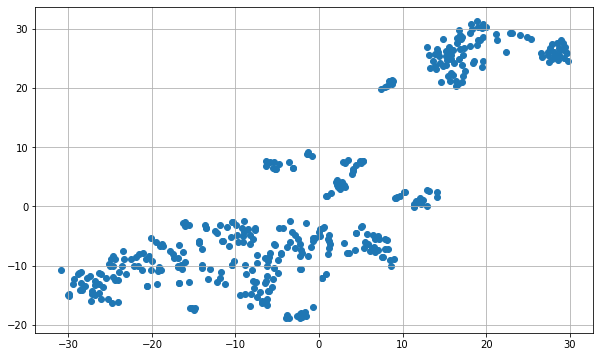

In [7]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
plt.plot()

### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах


In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter = 100, random_state=42)
y_pred = model.fit_predict(X_train_tsne)

[]

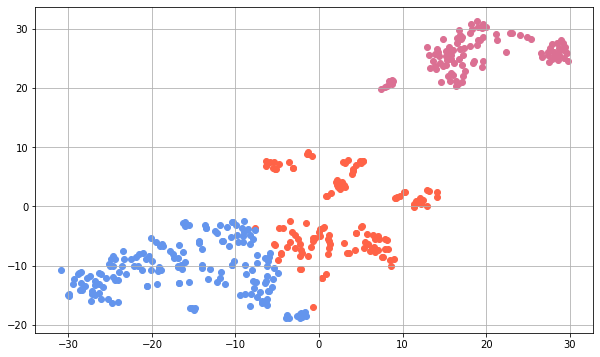

In [9]:
plt.figure(figsize = (10, 6))
colours = ['tomato', 'palevioletred', 'cornflowerblue']
for class_id in np.unique(y_pred):
    indexer = np.where(y_pred == class_id)
    plt.scatter(X_train_tsne[indexer][:, 0], X_train_tsne[indexer][:, 1], color = colours[class_id])
plt.grid()
plt.plot()

#### Задание 3


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [10]:
y_pred = model.fit_predict(X_test_tsne)

In [11]:
for class_id in np.unique(y_pred):
    indexer = np.where(y_pred == class_id)
    line = f'Для кластера {class_id} среднее значение признака CRIM равно {X_test[indexer][:, 0].mean() :1.4f}, ' \
    + f'признака price равно {y_test[indexer].mean() :1.4f}'
    print(line)

Для кластера 0 среднее значение признака CRIM равно 0.1090, признака price равно 27.1722
Для кластера 1 среднее значение признака CRIM равно 10.4013, признака price равно 16.3500
Для кластера 2 среднее значение признака CRIM равно 0.3997, признака price равно 20.5531
